In [57]:
import matplotlib.pyplot as plt
import numpy as np
from validator import ECDFDifference
from validator import HaralickValidator
from statsmodels.distributions.empirical_distribution import ECDF
import mahotas as mh
import config 
import random

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Example on toy data

In [2]:
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0.4, 1, 1000)

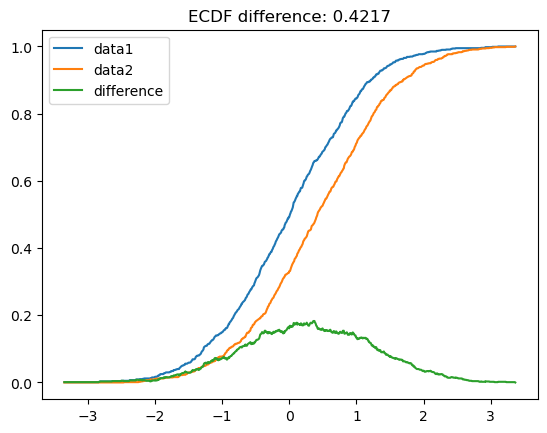

In [3]:
ecdf_diff = ECDFDifference(data1, data2)
combined_data = np.concatenate([data1, data2])
x = np.linspace(combined_data.min(), combined_data.max(), 1000)
y1 = ECDF(data1)(x)
y2 = ECDF(data2)(x)

plt.plot(x, y1, label='data1')
plt.plot(x, y2, label='data2')
plt.plot(x, np.abs(y1 - y2), label='difference')
plt.legend()
plt.title(f'ECDF difference: {ecdf_diff:.4f}')
plt.show()

## Results on Haralick features


In [43]:
num_samples = 2000
haralick_validator = HaralickValidator(img_dir1=config.REAL_IMGS_DIRECTORY, 
                                       img_dir2=config.FAKE_IMGS_DIRECTORY,
                                       num_samples=num_samples)

In [44]:
real_features, gen_features = haralick_validator.extract_features()

0it [00:00, ?it/s]

2000it [33:05,  1.01it/s]


In [45]:
import pickle

with open('real_features.pkl', 'wb') as f:
    pickle.dump(real_features, f)

with open('gen_features.pkl', 'wb') as f:
    pickle.dump(gen_features, f)
    

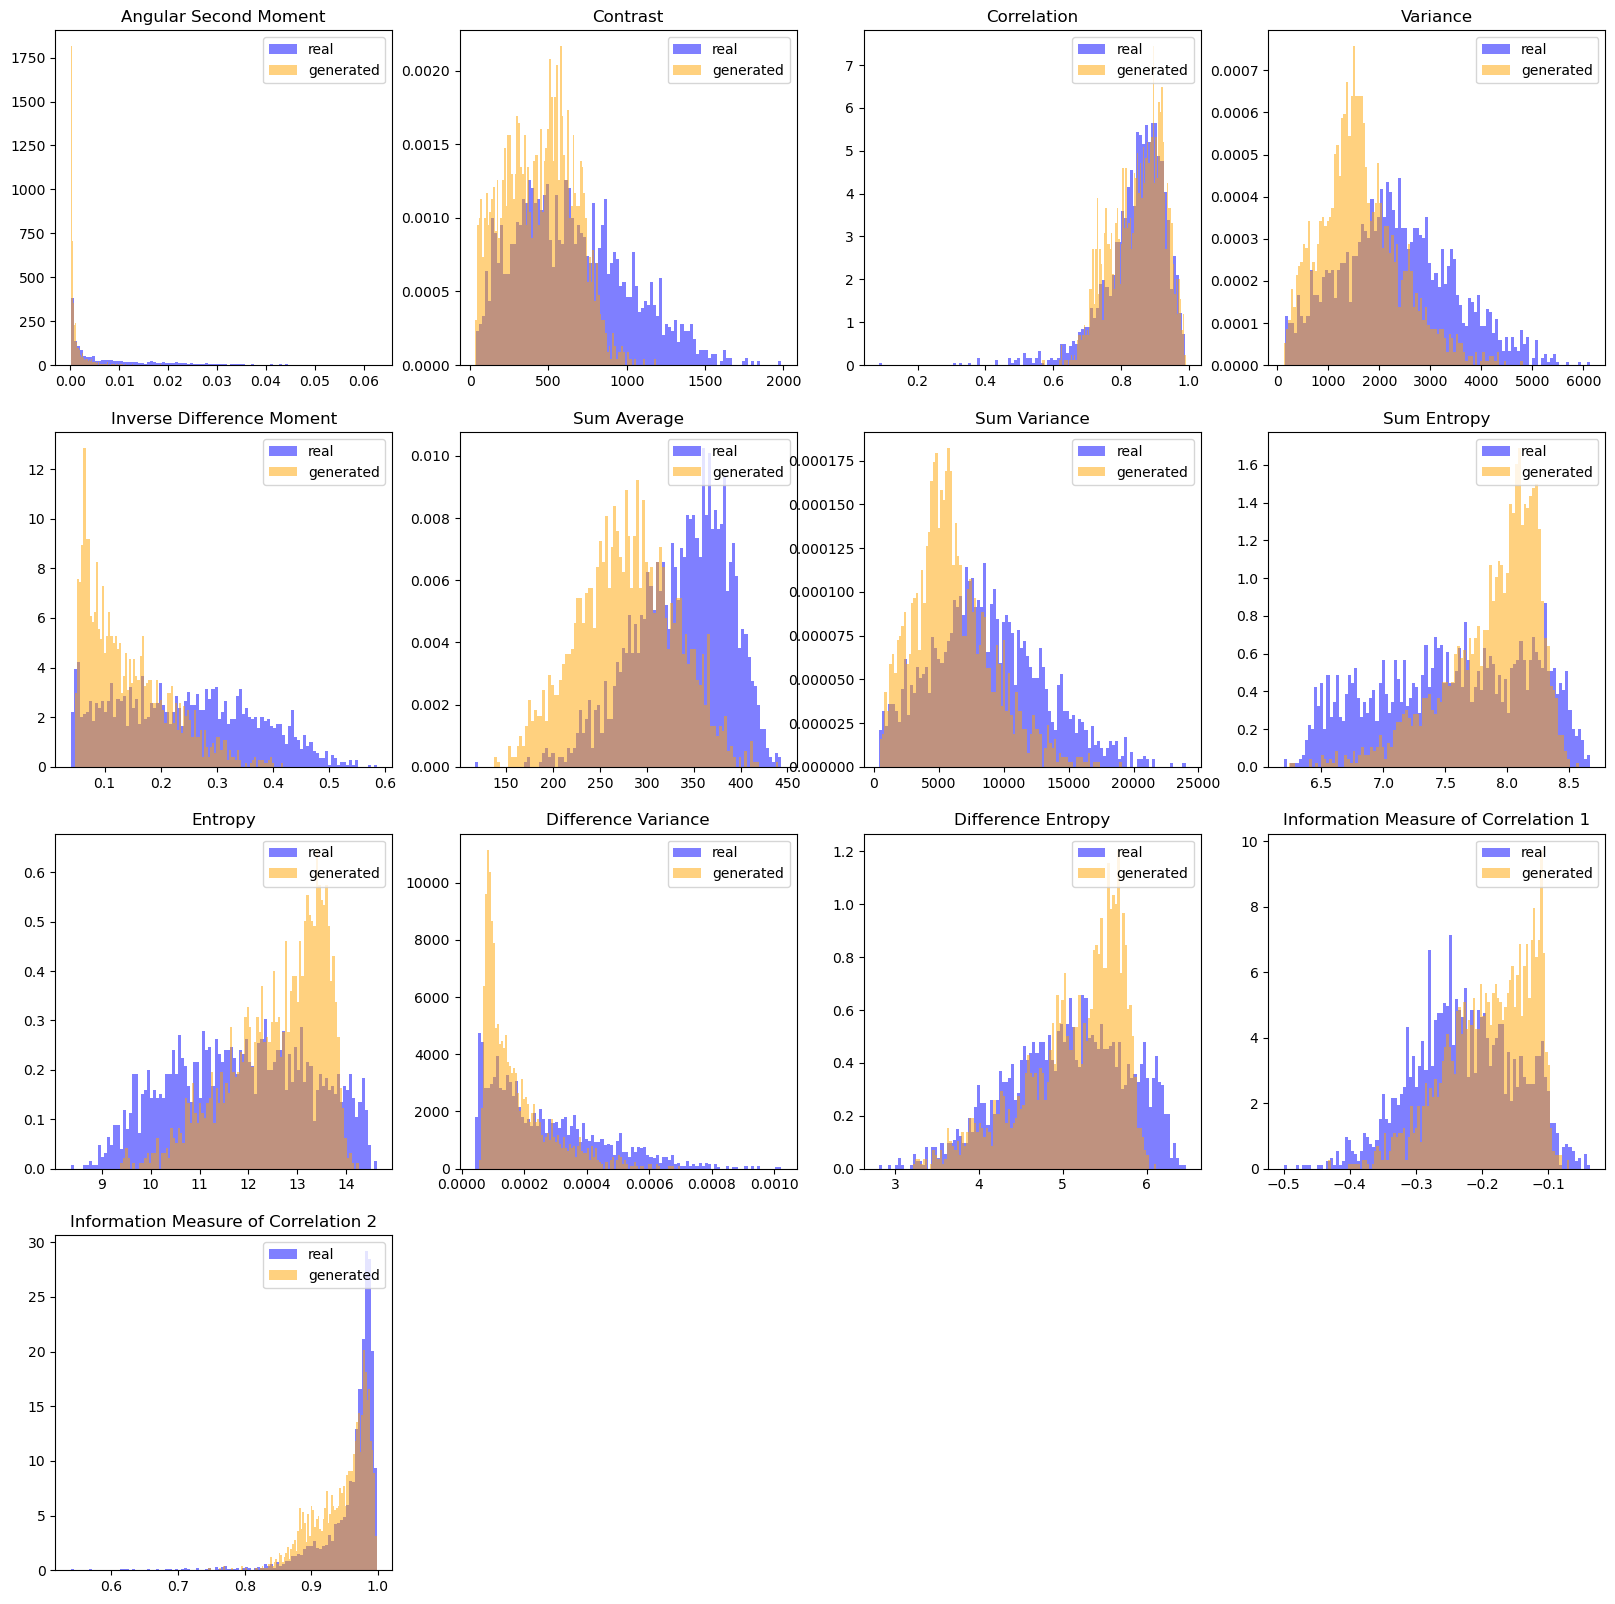

In [46]:
haralick_validator.plot_features(real_features, gen_features, label1='real', label2='generated')

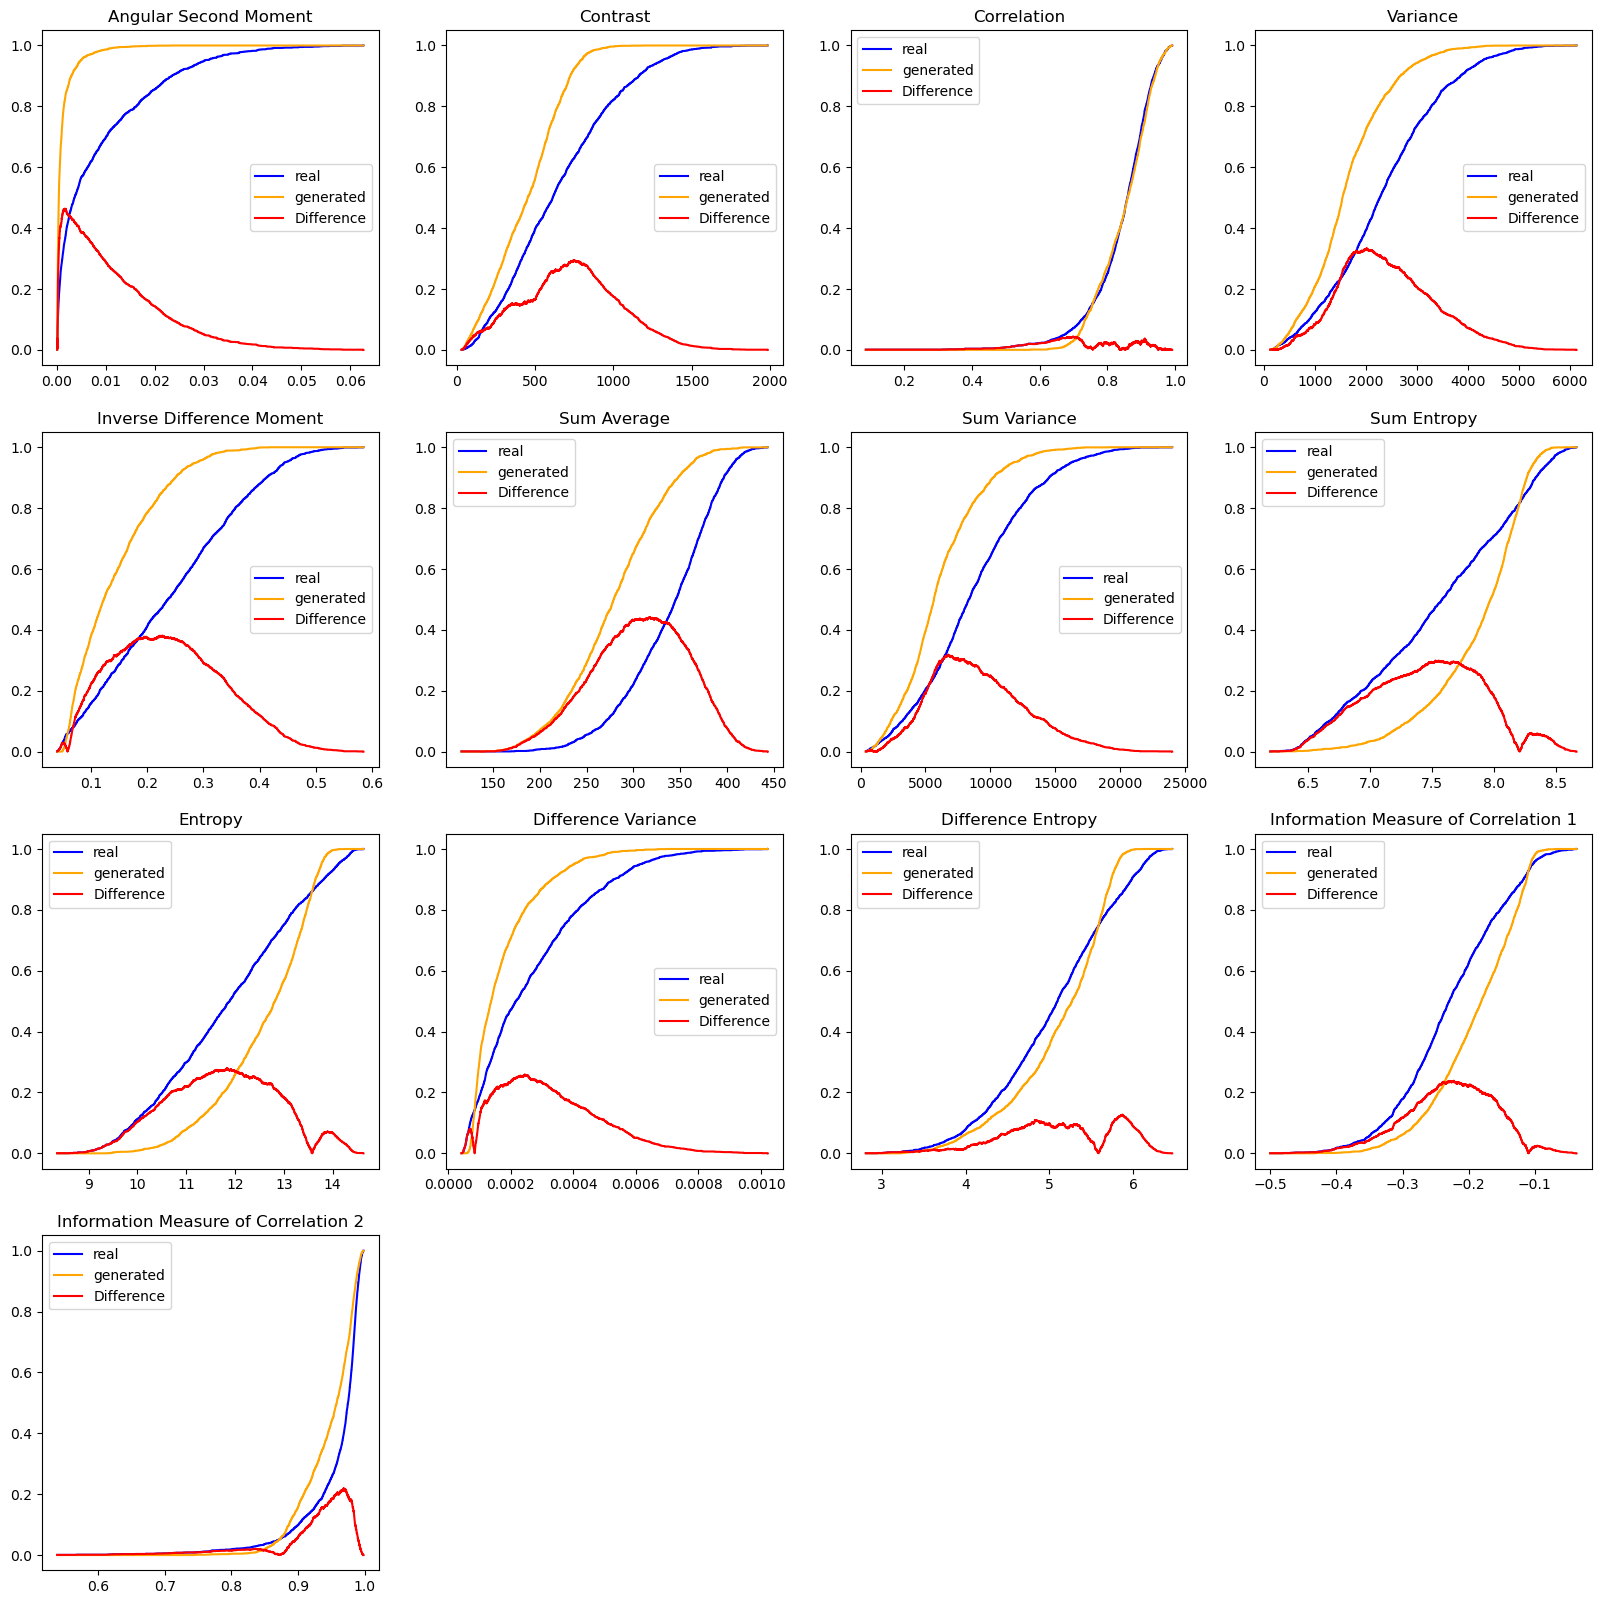

In [47]:
haralick_validator.plot_ecdf(real_features, gen_features, label1='real', label2='generated')

In [48]:
ecdf_haralick_diff = haralick_validator.evaluate_ecdf_differences(features1=real_features, features2=gen_features, bins=1000)

In [49]:
# evaluate the metric as the mean of the 13 ecdf differences
np.asarray(list(ecdf_haralick_diff.values())).mean()

276.9473889640974

### How the metric changes according to the number of features used for the evaluation?

In [82]:
N = np.arange(100, 2100, 100)

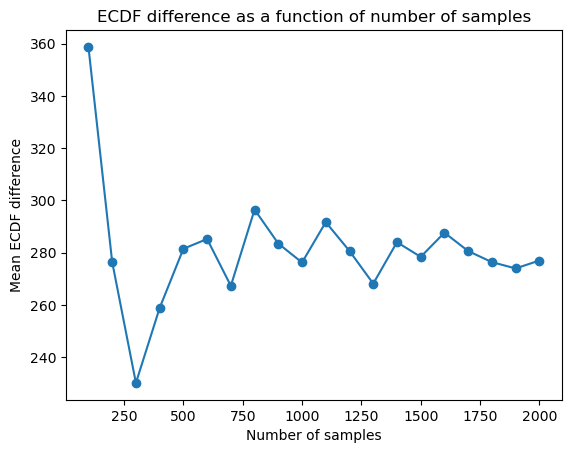

In [94]:
y = []
for n in N:
    indices = np.random.choice(2000, n, replace=False)
    subset_real = real_features[indices]
    subset_gen = gen_features[indices]
    ecdf_haralick_diff = haralick_validator.evaluate_ecdf_differences(features1=subset_real, features2=subset_gen)
    y.append(np.asarray(list(ecdf_haralick_diff.values())).mean())

plt.plot(N, y, marker='o')
plt.xlabel('Number of samples')
plt.ylabel('Mean ECDF difference')
plt.title('ECDF difference as a function of number of samples')
plt.show()